In [11]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import matplotlib.cm as cm
import numpy as np

Reading in the data and shapefiles

In [29]:
# Shapefiles
shapefile_path = 'data/neighborhoods'
sf_neighborhoods = gpd.read_file(shapefile_path)

regions_path = "data/regions"
sf_regions = gpd.read_file(regions_path)

# SF case and population data
sf_cases = pd.read_csv('data/master_merged.csv', index_col=False)
sf_cases.rename(columns={'Neighborhood': 'nhood'}, inplace=True)

Calculating centriods and distance between neighborhoods

In [30]:
sf_neighborhoods['centroid'] = sf_neighborhoods.geometry.centroid

/var/folders/6d/cy8w1dx943qfh0slyqz6l0xc0000gn/T/ipykernel_59192/766463007.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sf_neighborhoods['centroid'] = sf_neighborhoods.geometry.centroid


/var/folders/6d/cy8w1dx943qfh0slyqz6l0xc0000gn/T/ipykernel_59192/2118611098.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis = cm.get_cmap('cividis', 256)  # Get 256 different shades from cividis


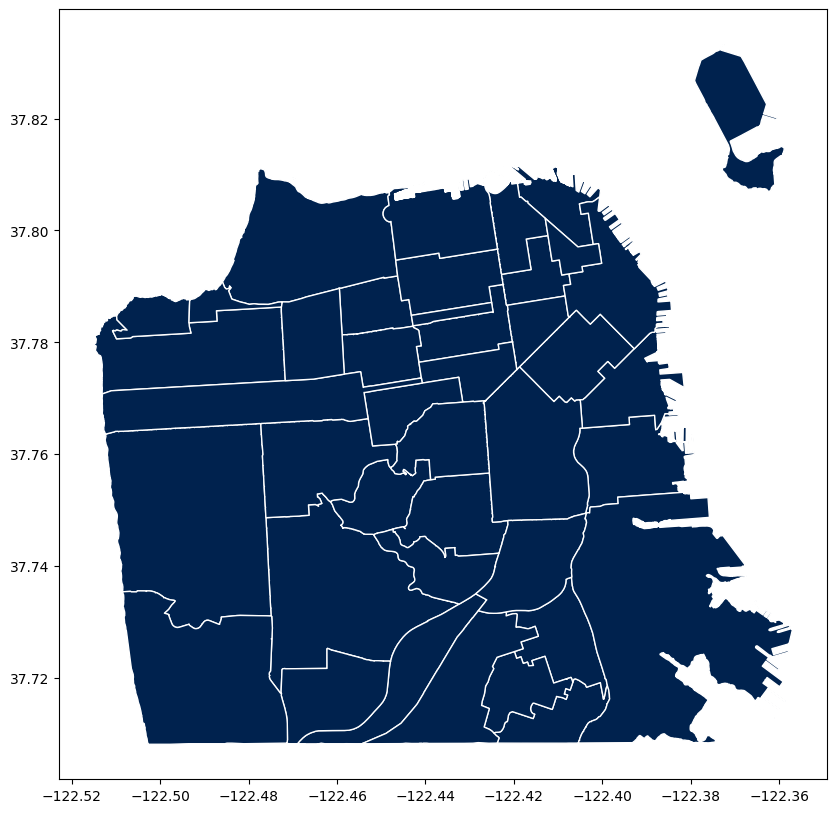

In [31]:
cividis = cm.get_cmap('cividis', 256) 
dark_blue = cividis(np.linspace(0, 1, 256))[0] 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sf_neighborhoods.plot(ax=ax, color=dark_blue, edgecolor='white')
plt.show()

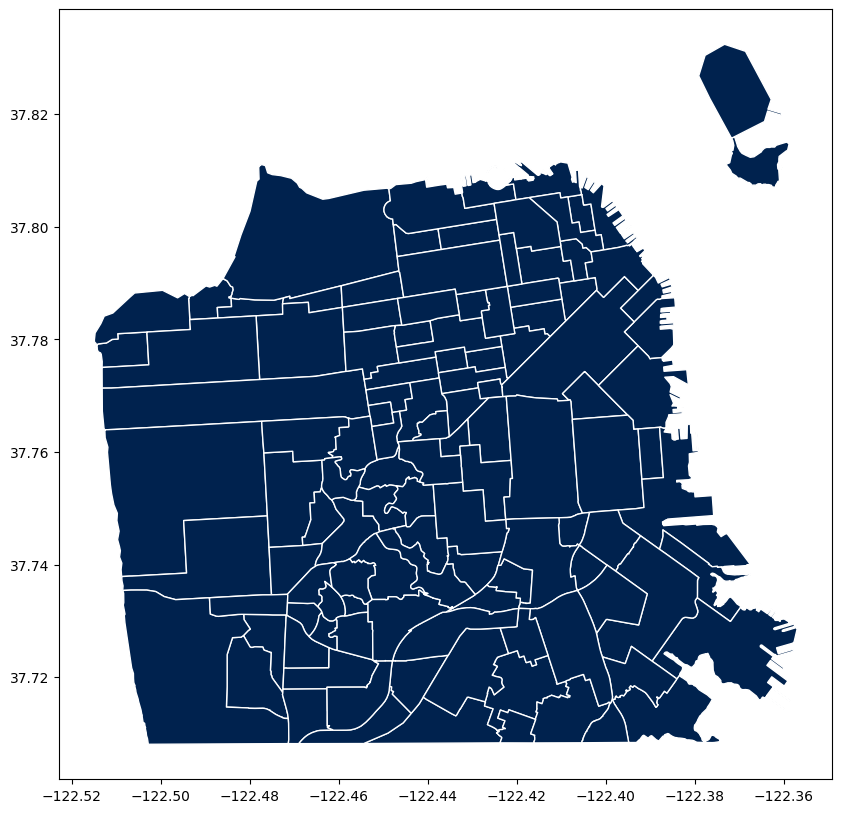

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sf_regions.plot(ax=ax, color=dark_blue, edgecolor='white')
plt.show()

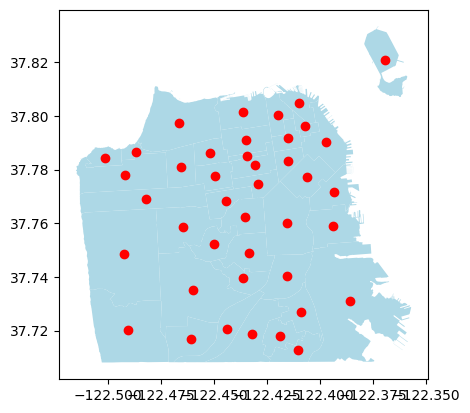

In [16]:
fig, ax = plt.subplots()
sf_neighborhoods.plot(ax=ax, color='lightblue')  # Plot the neighborhoods
sf_neighborhoods['centroid'].plot(ax=ax, color='red', marker='o')  # Plot centroids
plt.show()

To calculate distance, we need to map the centroids to a CRS (Projected coordinate reference system)

In [32]:
sf_neighborhoods_projected = sf_neighborhoods.to_crs(epsg=32610)
sf_neighborhoods_projected['centroid'] = sf_neighborhoods_projected.geometry.centroid

neighborhood_x = sf_neighborhoods_projected['centroid'].geometry.x
neighborhood_y = sf_neighborhoods_projected['centroid'].geometry.y

neighborhood_xy = np.column_stack((neighborhood_x, neighborhood_y))

distance_matrix = distance.cdist(neighborhood_xy, neighborhood_xy, 'euclidean')
distance_matrix /=  1000.0
distance_matrix

array([[0.        , 5.78396138, 7.86240563, ..., 2.20230757, 4.78604525,
        6.88429006],
       [5.78396138, 0.        , 5.04137657, ..., 3.71599748, 3.94308982,
        6.53113267],
       [7.86240563, 5.04137657, 0.        , ..., 5.91605107, 3.08980834,
        2.91626334],
       ...,
       [2.20230757, 3.71599748, 5.91605107, ..., 0.        , 2.98344701,
        5.56334106],
       [4.78604525, 3.94308982, 3.08980834, ..., 2.98344701, 0.        ,
        2.8160667 ],
       [6.88429006, 6.53113267, 2.91626334, ..., 5.56334106, 2.8160667 ,
        0.        ]])

Merge the data and save the result to 'sf_neighborhood_master.csv'

In [33]:
sf_neighborhoods = pd.merge(sf_neighborhoods, sf_cases, on = 'nhood', how = 'left')

# Save the results
sf_neighborhoods.to_csv('data/sf_neighborhood_master.csv')

Plotting the data

Text(70.22222222222221, 0.5, 'Latitude')

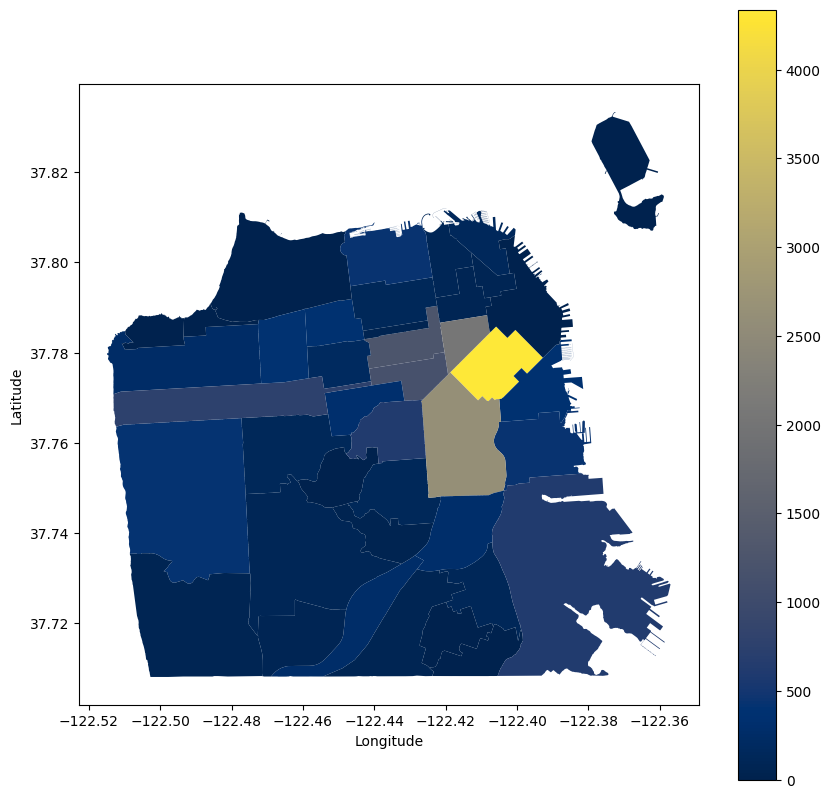

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sf_neighborhoods.plot(column='Homeless Cases', ax=ax, legend=True, cmap='cividis')
#plt.title('Homeless Concerns by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(70.22222222222221, 0.5, 'Latitude')

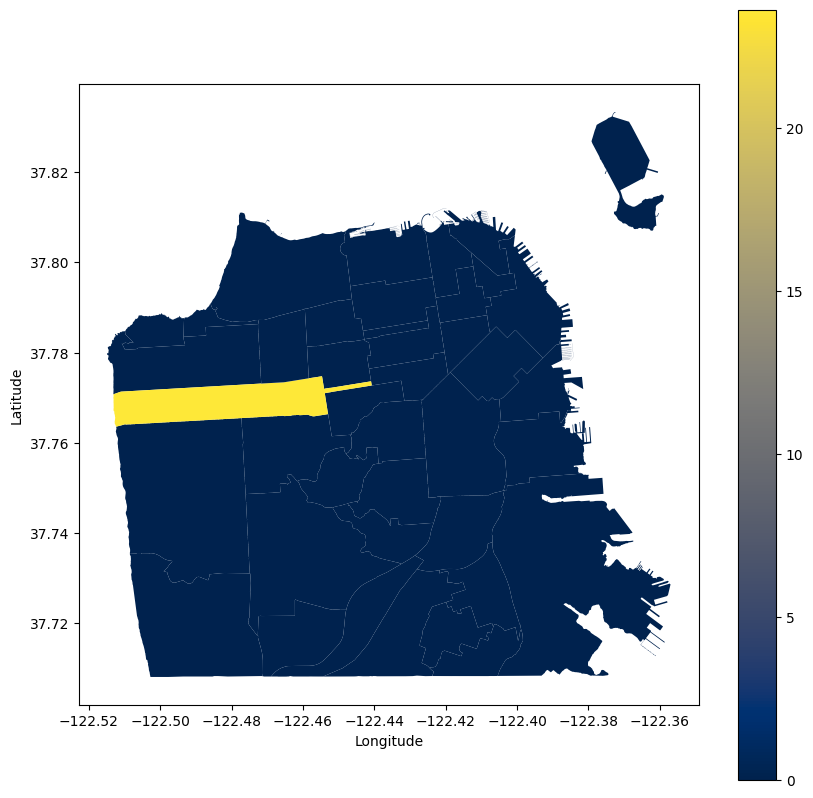

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sf_neighborhoods.plot(column='Homeless concern rate', ax=ax, legend=True, cmap='cividis')
#plt.title('San Francisco Neighborhoods by Homeless Concern Rates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [21]:
sf_neighborhoods_wout_ggp = sf_neighborhoods.copy(deep=False)
sf_neighborhoods_wout_ggp.loc[32, 'Homeless concern rate'] = 0

Text(70.22222222222221, 0.5, 'Latitude')

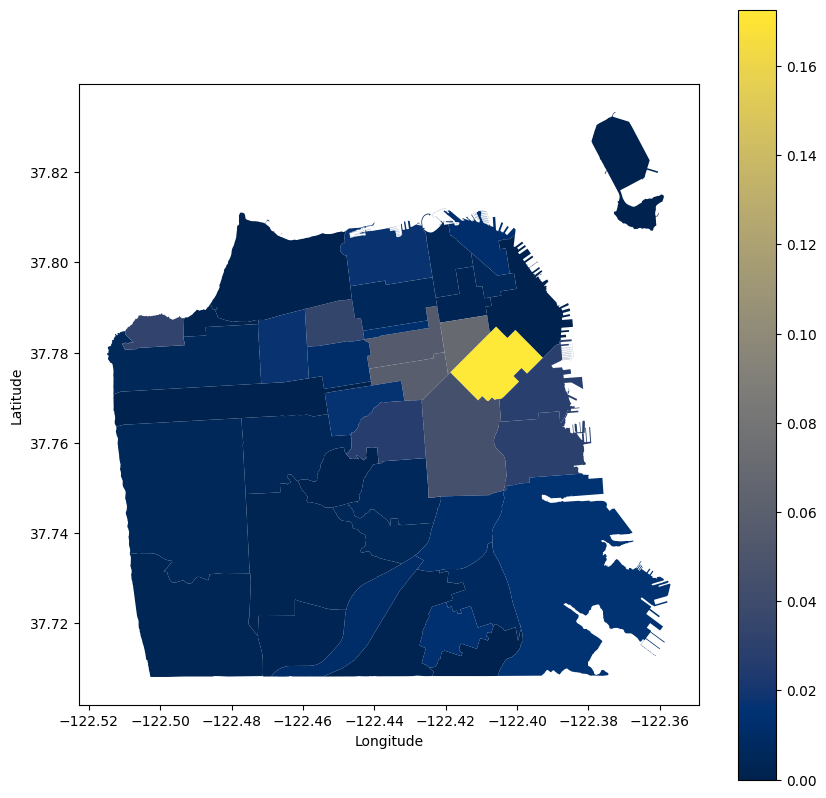

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sf_neighborhoods_wout_ggp.plot(column='Homeless concern rate', ax=ax, legend=True, cmap='cividis')
#plt.title('Homeless Concern Rates by Neighbourhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')